*Question 1:* In a QDA model observation within each class are assumed to be drawn from a normal distribution with class specific means and class specific variances. Suppose we have a single predictor $X$ (i.e., $p = 1$). If we have $K$ classes, $X \sim \mathcal{N}(\mu_k, \sigma_k)$, for $k = 1, \cdots, K$. Show that the decision boundary function $\delta_{k}(x)$ is quadratic in $x$.

*Question 2:* Let $X_1, \cdots, X_n$ be i.i.d random variables with mean $\mu$ and variance $\sigma^2$ and let $\bar{X} = \dfrac{1}{n} \sum_{i = 1}^n X_i$. Show that $E[\bar{X}] = \mu$ and $Var(\bar{X} ) = \sigma^2/n$. The random variable $S^2 = \dfrac{1}{n-1} \sum_{i = 1}^{n} (X_i - \bar{X})^2$ is called the sample variance. Show that $E[S^2] = \sigma^2$. Can you show that $\bar{X}$ and $S^2$ are independent (the last part is optional).

*Question 3:* Write an `R` function to compute the FPR and TPR for  binary QDA and LDA models at different values of cutoff threshold. Note that the threshold is determined by the prior class probabilities. 

*Question 4:* This question involves the development of a classification model to predict whether a given car gets higher or lower bass milage based on the Auto data. For this problem use appropriate predictors (e.g, Auto names should not be used.)

1. Perform a summary statistics on the variables.
1.Create a binary variable `mpg01`, that contains $1$ if mpg value is above the median, and $0$ if mpg is below the median. You may use `data.frame()` function to create a new data set with the binary response `mpg01` and other appropriate predictors.
1. Explore the data graphically. Color code the points based on response. Which predictor seems most associated with `mpg01`
1. Split the data randomly to train and test sets (use $2/3$ of the data from training and $1/3$ for testing. You can use  `sample()` function to randomly select the indices.)
1. Perform LDA on the training data in order to predict `mpg01` on the test set. You will need to use the `newdata` argument in the `predict()` function. What is the test error rate? Plot the ROC curve and compute the AUC.
1. Perform QDA on the training data in order to predict `mpg01` on the test set. What is the test error rate? Plot the ROC curve and compute the AUC. Perform a logistic regression  on the training data in order to predict `mpg01` on the test set. Perform a summary statistic on the fit object. What are the important predictors if any? Plot the ROC curve and compute the AUC.

 *Question 1:* Show $\delta_k(x)$ is quadratic in $x$.

 1. $\delta_k(x) = - \frac{1}{2} (x - \mu_k)^T \Sigma_{k}^{-1} (x - \mu_k) - \frac{1}{2} | \Sigma_k | + \log{\pi_k}$
 1. $\Sigma_{ij} = \mathrm{Cov}(x_i, x_j), \Sigma_{ij}^{-1} = \omega_{i, j}$
 1. $\Sigma^{-1} = \Omega = \begin{bmatrix} \omega_{1, 1} & ... & \omega_{1, k} \\ ... & ... & ... \\ \omega_{k, 1} & ... & \omega_{k, k} \end{bmatrix}$
 1. $(x - \mu_k)^T \Sigma_{k}^{-1} (x - \mu_k) = \begin{bmatrix} x_1 - \mu_{k1} & x_2 - \mu_{k2} & ... & x_k - \mu_{kk} \end{bmatrix} \times \begin{bmatrix} \omega_{1, 1} & ... & \omega_{1, k} \\ ... & ... & ... \\ \omega_{k, 1} & ... & \omega_{k, k} \end{bmatrix} \times \begin{bmatrix} x_1 - \mu_{k1} \\ x_2 - \mu_{k2} \\ ... \\ x_k - \mu_{kk} \end{bmatrix} $
 1. $(x - \mu_k)^T \Sigma_{k}^{-1} (x - \mu_k) = \begin{bmatrix} \sum_{i=1}^k \omega_{i, 1} (x_i - \mu_{ki}) & \sum_{i=1}^k \omega_{i, 2} (x_i - \mu_{ki}) & ... & \sum_{i=1}^k \omega_{i, k} (x_i - \mu_{ki}) \end{bmatrix} \times \begin{bmatrix} x_1 - \mu_{k1} \\ x_2 - \mu_{k2} \\ ... \\ x_k - \mu_{kk} \end{bmatrix}$
 1. $(x - \mu_k)^T \Sigma_{k}^{-1} (x - \mu_k) = \sum_{j=1}^k [(x_j - \mu_{kj}) \sum_{i=1}^k [\omega_{i, j} (x_i - \mu_{ki})]]$, which is quadratic in $x$.
 1. Because $\delta_k(x) = - \frac{1}{2} (x - \mu_k)^T \Sigma_{k}^{-1} (x - \mu_k) - \frac{1}{2} | \Sigma_k | + \log{\pi_k}$ and $(x - \mu_k)^T \Sigma_{k}^{-1} (x - \mu_k) = \sum_{j=1}^k [(x_j - \mu_{kj}) \sum_{i=1}^k [\omega_{i, j} (x_i - \mu_{ki})]]$ is quadratic in $x$, $\delta_k(x)$ is quadratic in $x$. Q.E.D.

*Question 2:* Let $X_1, \cdots, X_n$ be i.i.d random variables with mean $\mu$ and variance $\sigma^2$ and let $\bar{X} = \dfrac{1}{n} \sum_{i = 1}^n X_i$. Show that $E[\bar{X}] = \mu$ and $Var(\bar{X} ) = \sigma^2/n$. The random variable $S^2 = \dfrac{1}{n-1} \sum_{i = 1}^{n} (X_i - \bar{X})^2$ is called the sample variance. Show that $E[S^2] = \sigma^2$.
1. Show that $E[\bar{X}] = \mu$.

    1. $E[\bar{X}] = \frac{1}{n} E[\sum_{i=1}^n X_i] = \frac{1}{n} \sum_{i=1}^n [E [X_i]]$
    
    1. $E[X_i] = \mu \therefore E[\bar{X}] = \frac{1}{n} \sum_{i=1}^n [E [X_i]] = \frac{1}{n} \sum_{i=1}^n \mu = \mu $
    
    1. $E[\bar{X}] = \mu$ Q.E.D.
    
1. Show that $Var(\bar{X} ) = \sigma^2/n$.

    1. $Var[\bar{X}] = Var[\frac{1}{n} \sum_{i=1}^n X_i ] = \frac{1}{n^2} \sum_{i=1}^n Var[X_i] = \frac{1}{n^2} n \sigma^2 = \frac{\sigma^2}{n}$
    
    1. $Var(\bar{X} ) = \frac{\sigma^2}{n}$ Q.E.D.
    
1. For $S^2 = \dfrac{1}{n-1} \sum_{i = 1}^{n} (X_i - \bar{X})^2$, show that $E[S^2] = \sigma^2$.

    1. $E[S^2] = \frac{1}{n-1} E[ \sum_{i=1}^n (X_i - \bar{X})^2] = \frac{1}{n-1} \sum_{i=1}^n [ E[X_i ^2] - 2 E[X_i \bar{X}] + E[\bar{X}]]$
    
        1. $Var(x_i) = E[X_i ^2] - E[X_i]^2 \therefore E[X_i ^2] = \sigma^2 + \mu^2$
        
        1. $Var(\bar{X}) = E[\bar{X}^2] - E[\bar{X}]^2 \therefore E[\bar{X}^2] = \frac{\sigma^2}{n} + \mu^2$
        
        1. $E[X_i \bar{X}] = E[ X_i \frac{1}{n} \sum_{j=1}^n X_j] = \frac{1}{n} \sum_{j=1}^n E[X_i X_j]$
        
            1. When $i \neq j$ ($\frac{n-1}{n}$ cases): $E[X_i X_j] = \mu^2$
            
            1. When $i = j$ ($\frac{1}{n}$ cases): $E[X_i X_j]= E[X_i ^2] = \sigma^2 + \mu^2$
            
            1. $E[X_i \bar{X}] = \frac{1}{n} ((n-1)\mu^2 + (\sigma^2 + \mu^2))$
    
    1. $E[S^2] = \frac{1}{n-1} \sum_{i=1}^n [ E[X_i ^2] - 2 E[X_i \bar{X}] + E[\bar{X}]] = \frac{1}{n-1} \sum_{i=1}^n [\sigma^2 + \mu^2 - \frac{2}{n} ((n-1)\mu^2 + (\sigma^2 + \mu^2)) + \frac{\sigma^2}{n} + \mu^2]$
    
    1. $E[S^2] = \frac{1}{n-1} \sum_{i=1}^n [\sigma^2 + \mu^2 - \frac{2}{n}\sigma^2 - 2\mu^2 + \frac{\sigma^2}{n} + \mu^2]$
    
    1. $E[S^2] =  \frac{1}{n-1} \sum_{i=1}^n [\sigma^2 - \frac{2}{n}\sigma^2 + \frac{\sigma^2}{n}]$
    
    1. $E[S^2] =  \frac{1}{n-1} (n\sigma^2 - \sigma^2)$
    
    1. $E[S^2] = \sigma^2$ Q.E.D.
   

In [1]:
#Question 3: Compute FPR and TPR for binary QDA and LDA models at different values of cutoff threshold.

def compute_tpr_fpr(predicted_values, true_labels, threshold):
    #Error check: length of true_labels and predicted_values
    if len(predicted_values) != len(true_labels):
        raise ValueError("Predicted values and true labels are not same length as necessary.")
    
    #Error check: between  0 and 1
    if (threshold > 1 or threshold < 0):
        raise ValueError("Threshold must be 0 <= x <= 1")
    for predicted in predicted_values:
        if (predicted > 1 or predicted < 0):
            raise ValueError("Predicted values must be 0 <= x <= 1")
            
    #Classify observations based on the threshold
    predicted_labels = [1 if prob >= threshold else 0 for prob in predicted_values]
    
    
    #Compute TP, FP, TN, FN
    TP, FP, TN, FN = 0, 0, 0, 0
    for pred, true in zip(predicted_labels, true_labels):
        if pred == 1 and true == 1:
            TP += 1
        if pred == 1 and true == 0:
            FP += 1
        if pred == 0 and true == 1:
            FN += 1
        if pred == 0 and true == 0:
            TN += 1
    
    #Compute TPR and FPR
    try: #Error check: divide by zero
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
    except ZeroDivisionError:
        print("Error: Zero total negatives (FP + TN) or zero total positives (TP + FN)  (divide by zero)")
        return (None, None)
    
    return TPR, FPR #This function returns the TPR and FPR

In [2]:
#Question 4.1:Perform a summary statistics on the variables. 
#Create a binary variable `mpg01`, that contains $1$ if mpg value is above the median
#and $0$ if mpg is below the median. You may use `data.frame()` function to create a new data set
#with the binary response `mpg01` and other appropriate predictors.
from ISLP import load_data
import pandas as pd

Auto = load_data('Auto') #ISLP loads data as a pd dataframe
median_mpg = Auto['mpg'].median()

#creating binary variable mpg01
Auto['mpg01'] = (Auto['mpg'] > median_mpg).astype(int)

print(Auto)

#This will produce the summary statistics
print('Median mpg: ', median_mpg)
Auto.describe()

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  mpg01  
0         1  ch

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.500000
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.500639
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


Interpretation of summary statistics: The mean of the mpg is greater than the median, suggesting that the distribution is skewed slightly right. The mean of mpg01 is 0.5, suggesting that there are exactly as many mpg points below the threshold as above the threshold (this is consistent with the definition of the median).

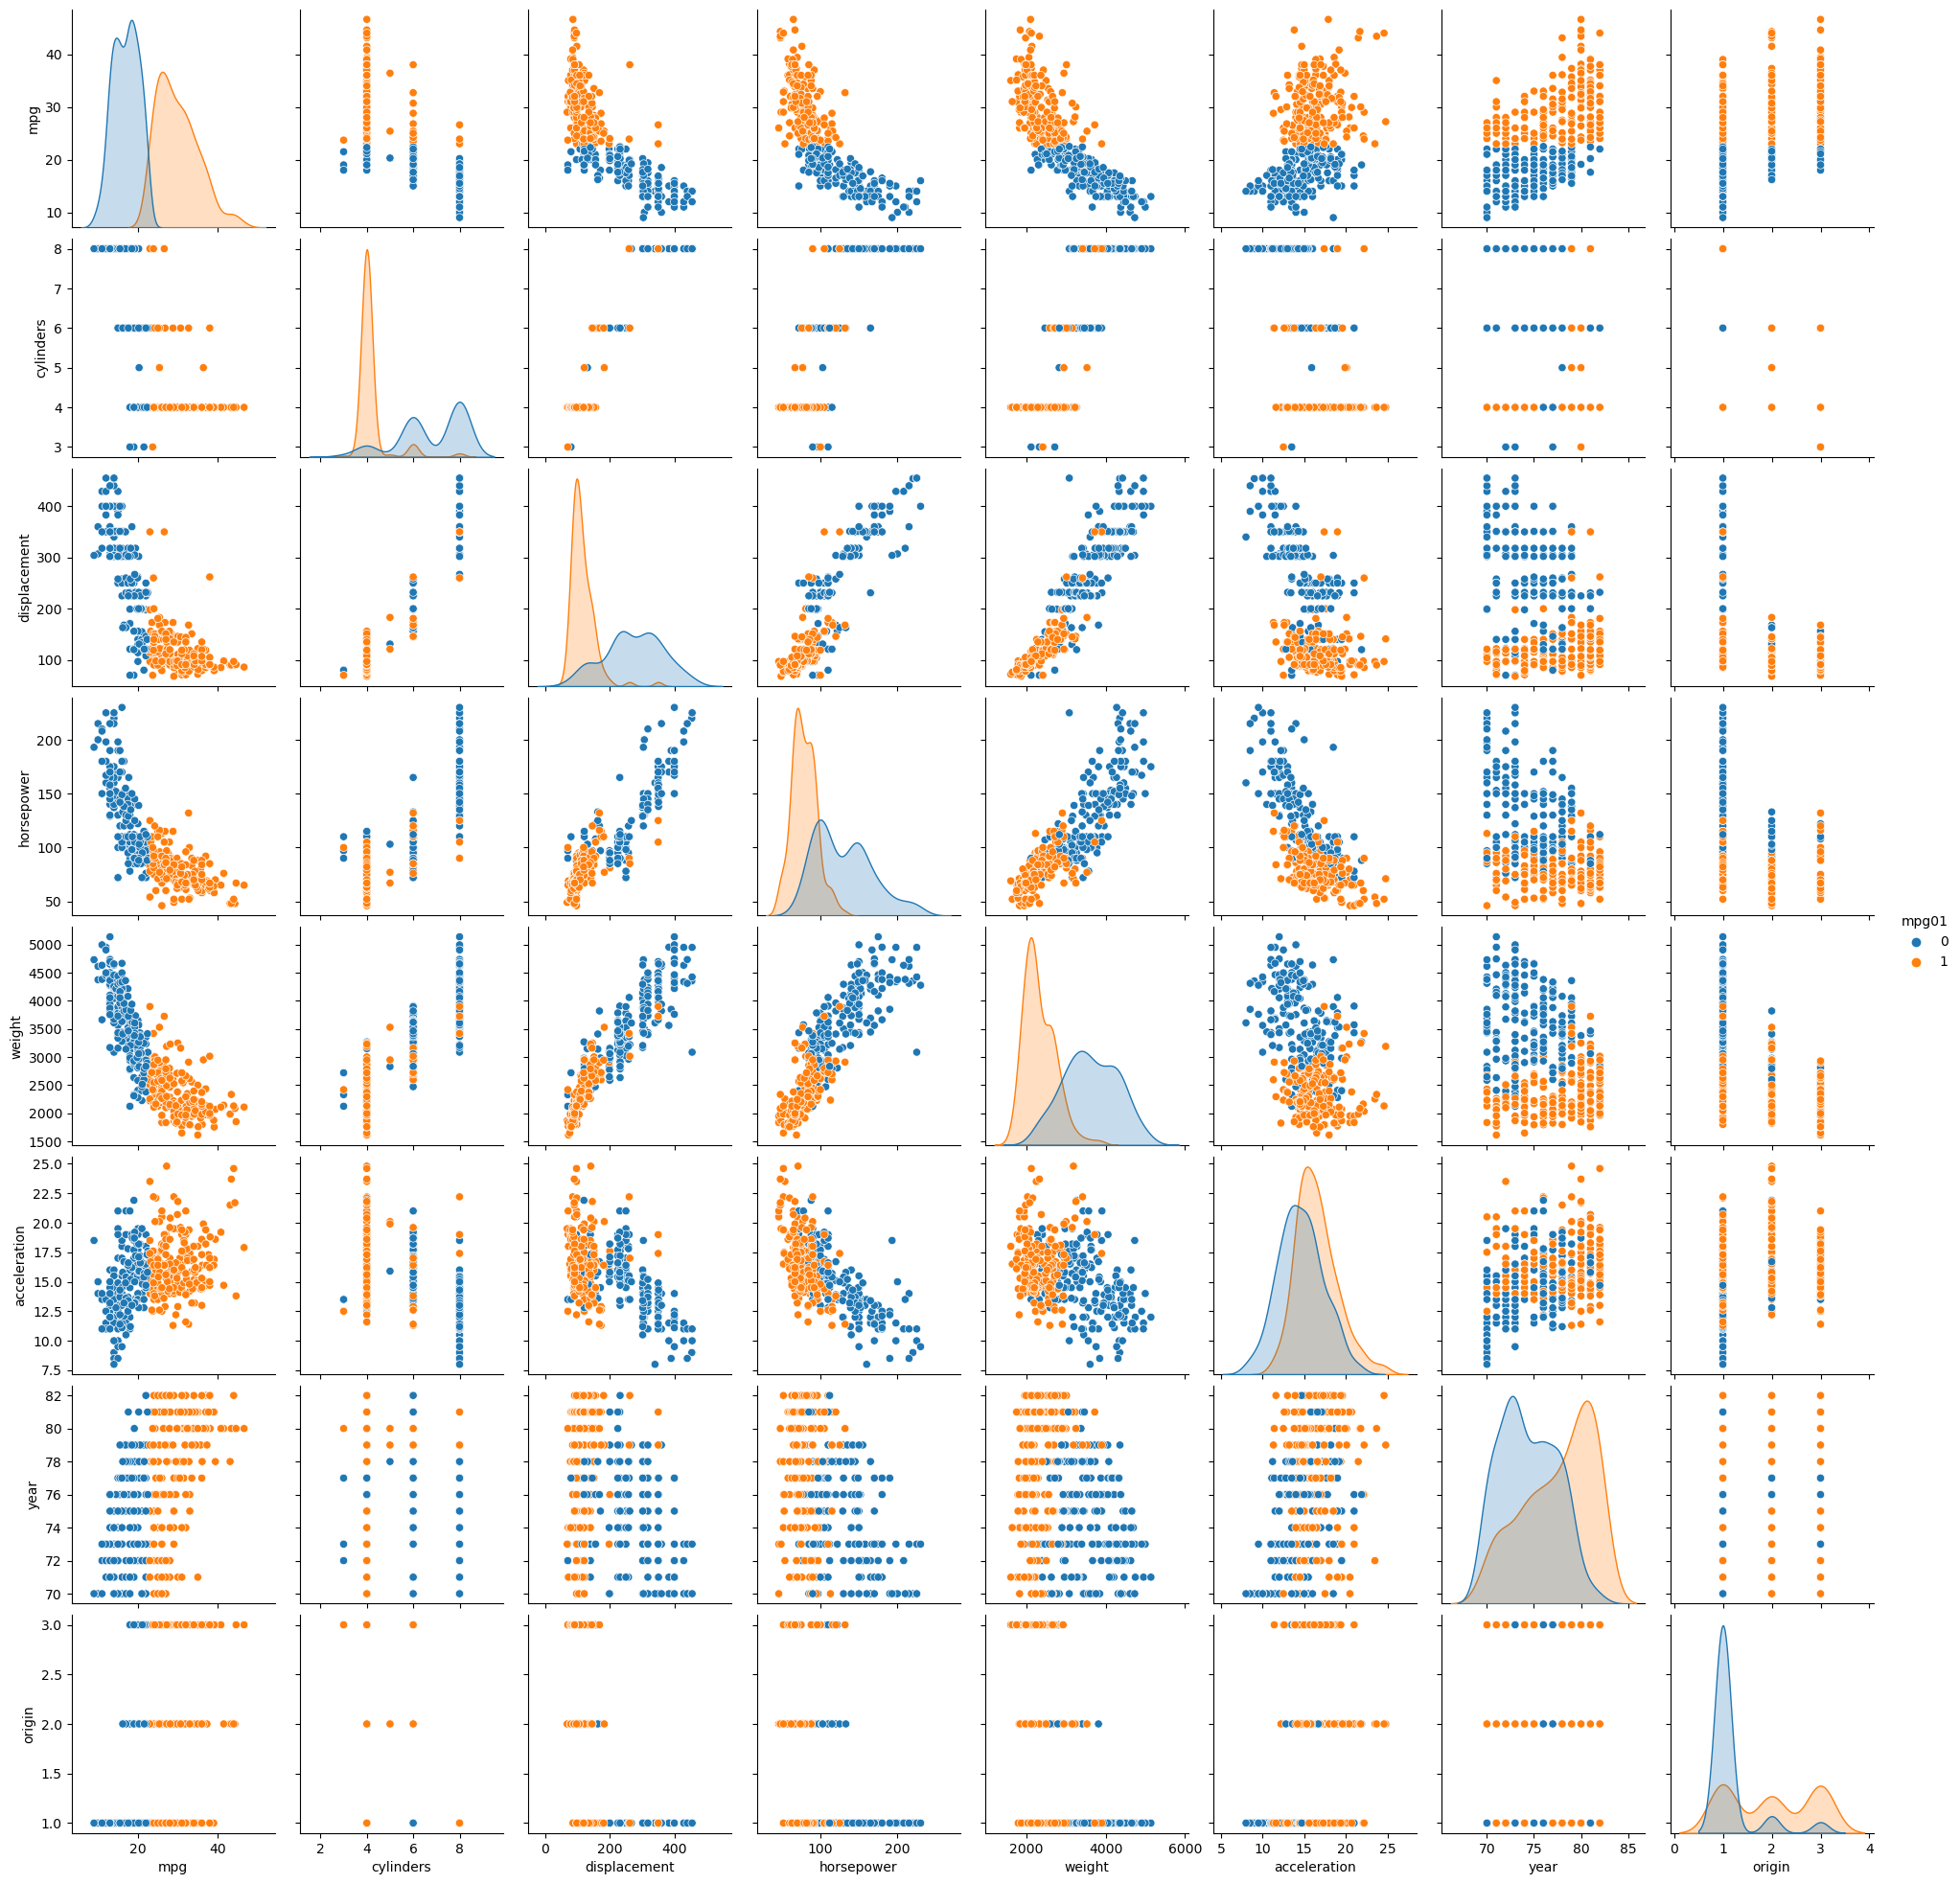

In [3]:
#Question 4.2: Explore the data graphically. 
#Color code the points based on response. 
#Which predictor seems most associated with `mpg01`?
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(Auto, hue='mpg01') #scatterplot matrix colorcoded against mpg01

plt.show()

Mpg, cylinders, displacement, and origin seem to be most associated with `mpg01` (whether the mpg will be above the median value), while year and acceleration seem to be worse predictors, and horsepower and weight might be somewhere in the middle. These conjectures are based on the appearance of the distributions' overlaps with respect to the `mpg01` color coding.

In [4]:
#Question 4.3: Split the data randomly to train and test sets
#(use $2/3$ of the data from training and $1/3$ for testing.
#You can use  `sample()` function to randomly select the indices.)
import numpy as np
from sklearn.model_selection import train_test_split

#exclude irrelevant data from predictors (mpg is redundant to the response, and the name of the car is irrelevant)
X = Auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = Auto['mpg01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(TPR, FPR):  (1.0, 0.24285714285714285)
Truth       0   1
Predicted        
0          53   0
1          17  60


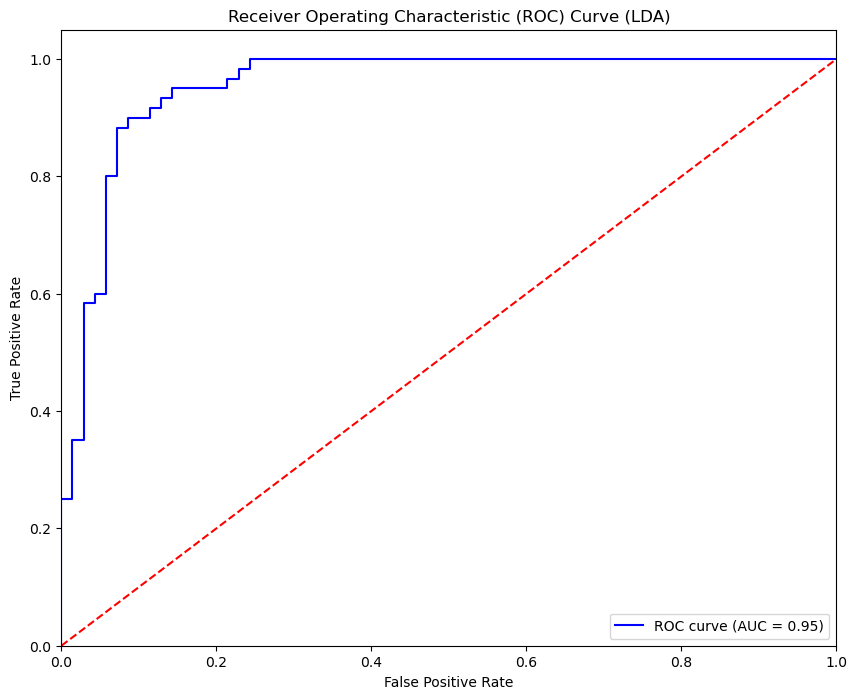

Error rate:  0.13076923076923078


In [5]:
#Question 4.4
#Perform LDA on the training data in order to predict mpg01 on the test set.
#What is the test error rate? Plot the ROC curve and compute the AUC
from ISLP.models import (ModelSpec as MS, summarize)
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from ISLP import confusion_table
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

lda = LDA(store_covariance = True)
lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)

#choose 0.5 threshold for the tpr fpr computation because we are predicting whether the mpg is above the median
print('(TPR, FPR): ', compute_tpr_fpr(lda_pred, y_test, 0.5))

y_prob = lda.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
AreaUnderCurve = roc_auc_score(y_test, y_prob[:, 1])

confusion = confusion_table(lda_pred, y_test)
print(confusion)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % AreaUnderCurve)
plt.plot([0, 1], [0, 1], color = 'red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (LDA)')
plt.legend(loc='lower right')
plt.show()

#the error rate is computed from the values in the confusion table by pandas df numerical coordinates
error_rate = (confusion.iloc[0, 1] + confusion.iloc[1, 0]) / (confusion.iloc[0, 0] + confusion.iloc[0, 1] + confusion.iloc[1, 0] + confusion.iloc[1, 1])
print("Error rate: ", error_rate)


(TPR, FPR):  (0.95, 0.22857142857142856)
Truth       0   1
Predicted        
0          54   3
1          16  57


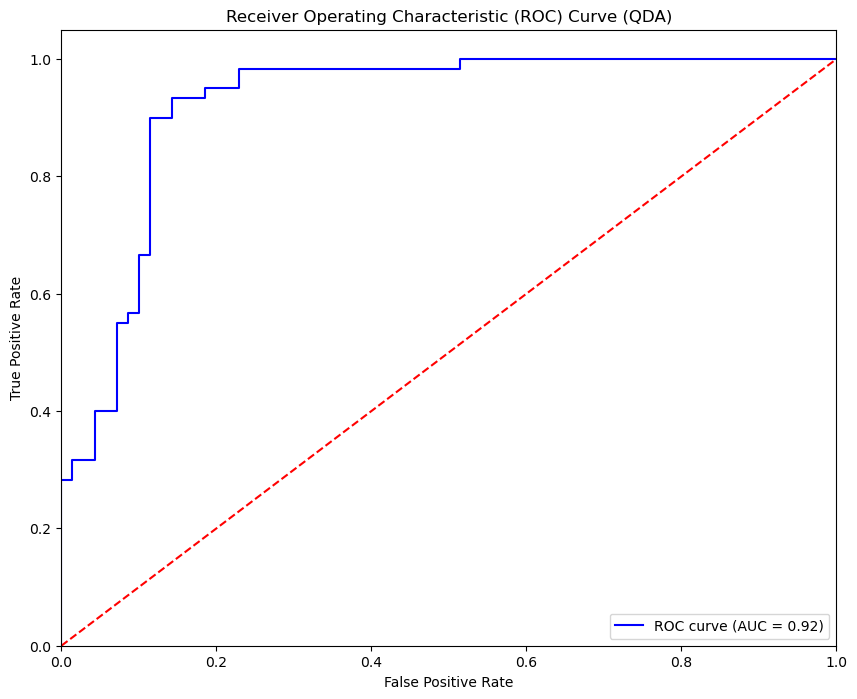

Error rate:  0.14615384615384616


In [6]:
#Question 4.5a
#Perform QDA on the training data in order to predict mpg01 on the test set.
#What is the test error rate? Plot the ROC curve and compute the AUC.

qda = QDA(store_covariance = True)
qda.fit(X_train, y_train)

qda_pred = qda.predict(X_test)

print('(TPR, FPR): ', compute_tpr_fpr(qda_pred, y_test, 0.5))

y_prob = qda.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
AreaUnderCurve = roc_auc_score(y_test, y_prob[:, 1])

confusion = confusion_table(qda_pred, y_test)
print(confusion)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % AreaUnderCurve)
plt.plot([0, 1], [0, 1], color = 'red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (QDA)')
plt.legend(loc='lower right')
plt.show()

#the error rate is computed from the values in the confusion table by pandas df numerical coordinates
error_rate = (confusion.iloc[0, 1] + confusion.iloc[1, 0]) / (confusion.iloc[0, 0] + confusion.iloc[0, 1] + confusion.iloc[1, 0] + confusion.iloc[1, 1])
print("Error rate: ", error_rate)

                coef  std err      z  P>|z|
cylinders    -0.4738    0.549 -0.863  0.388
displacement  0.0144    0.015  0.952  0.341
horsepower   -0.0876    0.029 -3.056  0.002
weight       -0.0039    0.001 -2.812  0.005
acceleration -0.1775    0.161 -1.100  0.271
year          0.2803    0.059  4.784  0.000
origin        0.9088    0.524  1.734  0.083
78     1
274    0
246    1
55     1
387    1
      ..
232    1
193    1
238    1
152    0
346    1
Length: 130, dtype: int64
(TPR, FPR):  (0.9666666666666667, 0.21428571428571427)
Truth       0   1
Predicted        
0          55   2
1          15  58


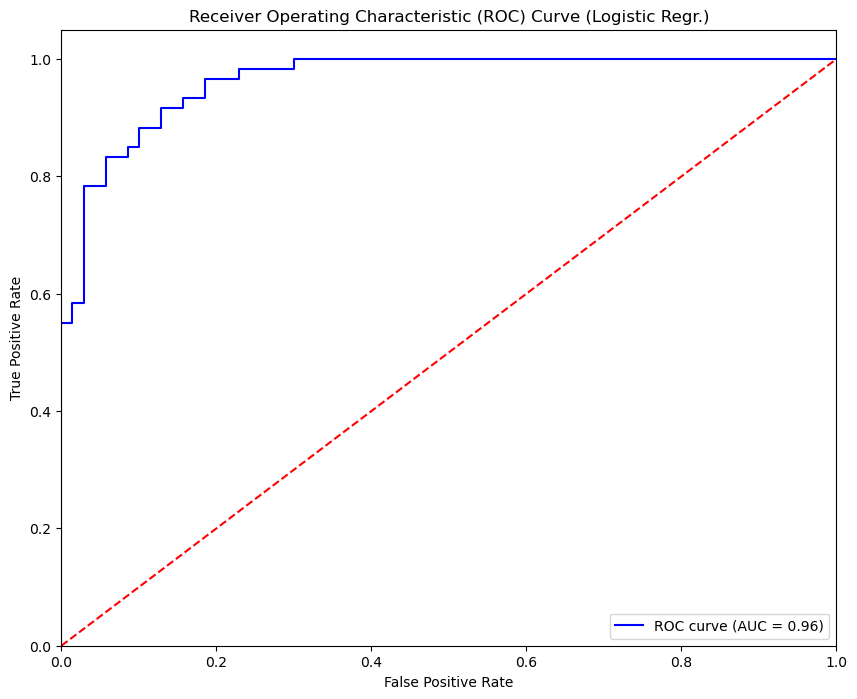

Error rate:  0.13076923076923078


In [7]:
#Question 4.5b
#Perform a logistic regression on the training data in order to predict mpg01 on the test set.
#Perform a summary statistic on the fit object. What are the important predictors if any?
#Plot the ROC curve and compute the AUC.
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

logistic_model = sm.GLM(y_train,
                       X_train,
                       family = sm.families.Binomial())
results = logistic_model.fit()
print(summarize(results)) #perform the summary statistic
logistic_predict = (results.predict(X_test) > 0.5).astype(int)
print(logistic_predict)
print('(TPR, FPR): ',compute_tpr_fpr(logistic_predict, y_test, 0.5))

y_prob = results.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
AreaUnderCurve = roc_auc_score(y_test, y_prob)

confusion = confusion_table(logistic_predict, y_test)
print(confusion)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % AreaUnderCurve)
plt.plot([0, 1], [0, 1], color = 'red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regr.)')
plt.legend(loc='lower right')
plt.show()

#the error rate is computed from the values in the confusion table by pandas df numerical coordinates
error_rate = (confusion.iloc[0, 1] + confusion.iloc[1, 0]) / (confusion.iloc[0, 0] + confusion.iloc[0, 1] + confusion.iloc[1, 0] + confusion.iloc[1, 1])
print("Error rate: ", error_rate)

The statistically significant predictors in this model are horsepower, weight, and year. However, the impact of the magnitude of the coefficients in horsepower and weight is not very large. However, the substantial positive correlation of the model year matched with the statistical significance shows that the year the car was manufactured is the most important predictor for whether that car will have a miles/gallon above the median.